<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Conditioned-unet" data-toc-modified-id="Conditioned-unet-1">Conditioned unet</a></span><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1.1">Goal</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-1.2">Imports</a></span></li><li><span><a href="#First-steps" data-toc-modified-id="First-steps-1.3">First steps</a></span></li><li><span><a href="#Modifying-the-model-configuration" data-toc-modified-id="Modifying-the-model-configuration-1.4">Modifying the model configuration</a></span></li><li><span><a href="#Save-and-load-the-model" data-toc-modified-id="Save-and-load-the-model-1.5">Save and load the model</a></span></li><li><span><a href="#Customizing-the-model" data-toc-modified-id="Customizing-the-model-1.6">Customizing the model</a></span></li><li><span><a href="#Try-the-model-on-real-data" data-toc-modified-id="Try-the-model-on-real-data-1.7">Try the model on real data</a></span><ul class="toc-item"><li><span><a href="#Create-model" data-toc-modified-id="Create-model-1.7.1">Create model</a></span></li><li><span><a href="#Create-data" data-toc-modified-id="Create-data-1.7.2">Create data</a></span></li><li><span><a href="#Train" data-toc-modified-id="Train-1.7.3">Train</a></span></li></ul></li><li><span><a href="#Train-more-and-save-to-file" data-toc-modified-id="Train-more-and-save-to-file-1.8">Train more and save to file</a></span></li></ul></li></ul></div>

# Conditioned unet

## Goal

On this notebook I want to explore the github repo https://github.com/gabolsgabs/cunet to see if I can reuse it for Luxai challenge.

## Imports

In [1]:
# Use this to reload changes in python scripts
%load_ext autoreload
%autoreload 2

In [2]:
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras as keras

from luxai.cunet import cunet_model, cunet_luxai_model, config
from luxai.input_features import make_input
from luxai.output_features import (
    create_actions_mask, create_output_features,
    UNIT_ACTIONS_MAP, CITY_ACTIONS_MAP)

2021-10-18 06:54:51.968062: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-18 06:54:51.968079: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Loading environment football failed: No module named 'gfootball'


In [3]:
plt.plot()
plt.close('all')
plt.rcParams["figure.figsize"] = (30, 5)  
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['font.size'] = 16

## First steps

In [4]:
model = cunet_model()
model.summary()

2021-10-17 09:32:00.627449: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-17 09:32:01.428169: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22308 MB memory:  -> device: 0, name: GeForce RTX 3090, pci bus id: 0000:17:00.0, compute capability: 8.6
2021-10-17 09:32:01.429090: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 21543 MB memory:  -> device: 1, name: GeForce RTX 3090, pci bus id: 0000:65:00.0, compute capability: 8.6


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1, 4)]       0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 1, 16)        80          input_2[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 1, 64)        1088        dense[0][0]                      
__________________________________________________________________________________________________
dropout (Dropout)               (None, 1, 64)        0           dense_1[0][0]                    
______________________________________________________________________________________________

/home/gbarbadillo/miniconda3/envs/luxai/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [5]:
model.inputs

[<KerasTensor: shape=(None, 512, 128, 1) dtype=float32 (created by layer 'input_1')>,
 <KerasTensor: shape=(None, 1, 4) dtype=float32 (created by layer 'input_2')>]

In [6]:
model.predict([np.zeros((1, 512, 128, 1)), np.zeros((1, 1, 4))]).shape

2021-10-17 09:32:02.247492: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-17 09:32:03.150217: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8100
2021-10-17 09:32:04.863980: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2021-10-17 09:32:04.865936: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-10-17 09:32:04.867391: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-10-17 09:32:04.867430: W tensorflow/stream_executor/gpu/asm_compiler.cc:77] Couldn't get ptxas version string: Internal: Couldn't invoke ptxas --version
2021-10-17 09:32:04.868560: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such fi

(1, 512, 128, 1)

It does not find ptxas, even after installing cudatoolkit-dev

In [6]:
model.predict([np.zeros((1, 512, 128, 1)), np.zeros((1, 1, 4))]).shape

2021-10-17 07:57:05.423086: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-17 07:57:06.301671: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8100
2021-10-17 07:57:08.085132: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2021-10-17 07:57:08.087223: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-10-17 07:57:08.088158: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-10-17 07:57:08.088196: W tensorflow/stream_executor/gpu/asm_compiler.cc:77] Couldn't get ptxas version string: Internal: Couldn't invoke ptxas --version
2021-10-17 07:57:08.089225: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such fi

(1, 512, 128, 1)

## Modifying the model configuration

In [10]:
config.N_LAYERS = 2

In [11]:
model = cunet_model()
model.summaryry()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 1, 4)]       0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 1, 16)        80          input_4[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 1, 64)        1088        dense_5[0][0]                    
__________________________________________________________________________________________________
dropout_5 (Dropout)             (None, 1, 64)        0           dense_6[0][0]                    
____________________________________________________________________________________________

/home/gbarbadillo/miniconda3/envs/luxai/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


We have reduced the number of parameters from 9M to 49k, so this shows we can modify the model configuration very easily.

## Save and load the model

Let's verify that we can save and load the model.

In [12]:
model.save('delete.h5')

/home/gbarbadillo/miniconda3/envs/luxai/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [14]:
loaded_model = keras.models.load_model('delete.h5')

In [15]:
loaded_model.predict([np.zeros((1, 512, 128, 1)), np.zeros((1, 1, 4))]).shape

(1, 512, 128, 1)

In [21]:
random_input = [np.random.normal(size=(1, 512, 128, 1)), np.random.normal(size=(1, 1, 4))]
pred = model.predict(random_input)
pred2 = loaded_model.predict(random_input)

np.mean(pred2 == pred)

1.0

There does not seem to be a problem.

## Customizing the model

I have tried setting the x, and y to None but did not work. The output of the model needs to be slighlty different, so I'm going to modify the function for creating the model.

/home/gbarbadillo/miniconda3/envs/luxai/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "model_14"
______________________________________________________________________________________________________________________________________________________
Layer (type)                                     Output Shape                     Param #           Connected to                                      
input_16 (InputLayer)                            [(None, 1, 12)]                  0                                                                   
______________________________________________________________________________________________________________________________________________________
board_input (InputLayer)                         [(None, 32, 32, 22)]             0                                                                   
______________________________________________________________________________________________________________________________________________________
dense_22 (Dense)                                 (None, 1, 16)              

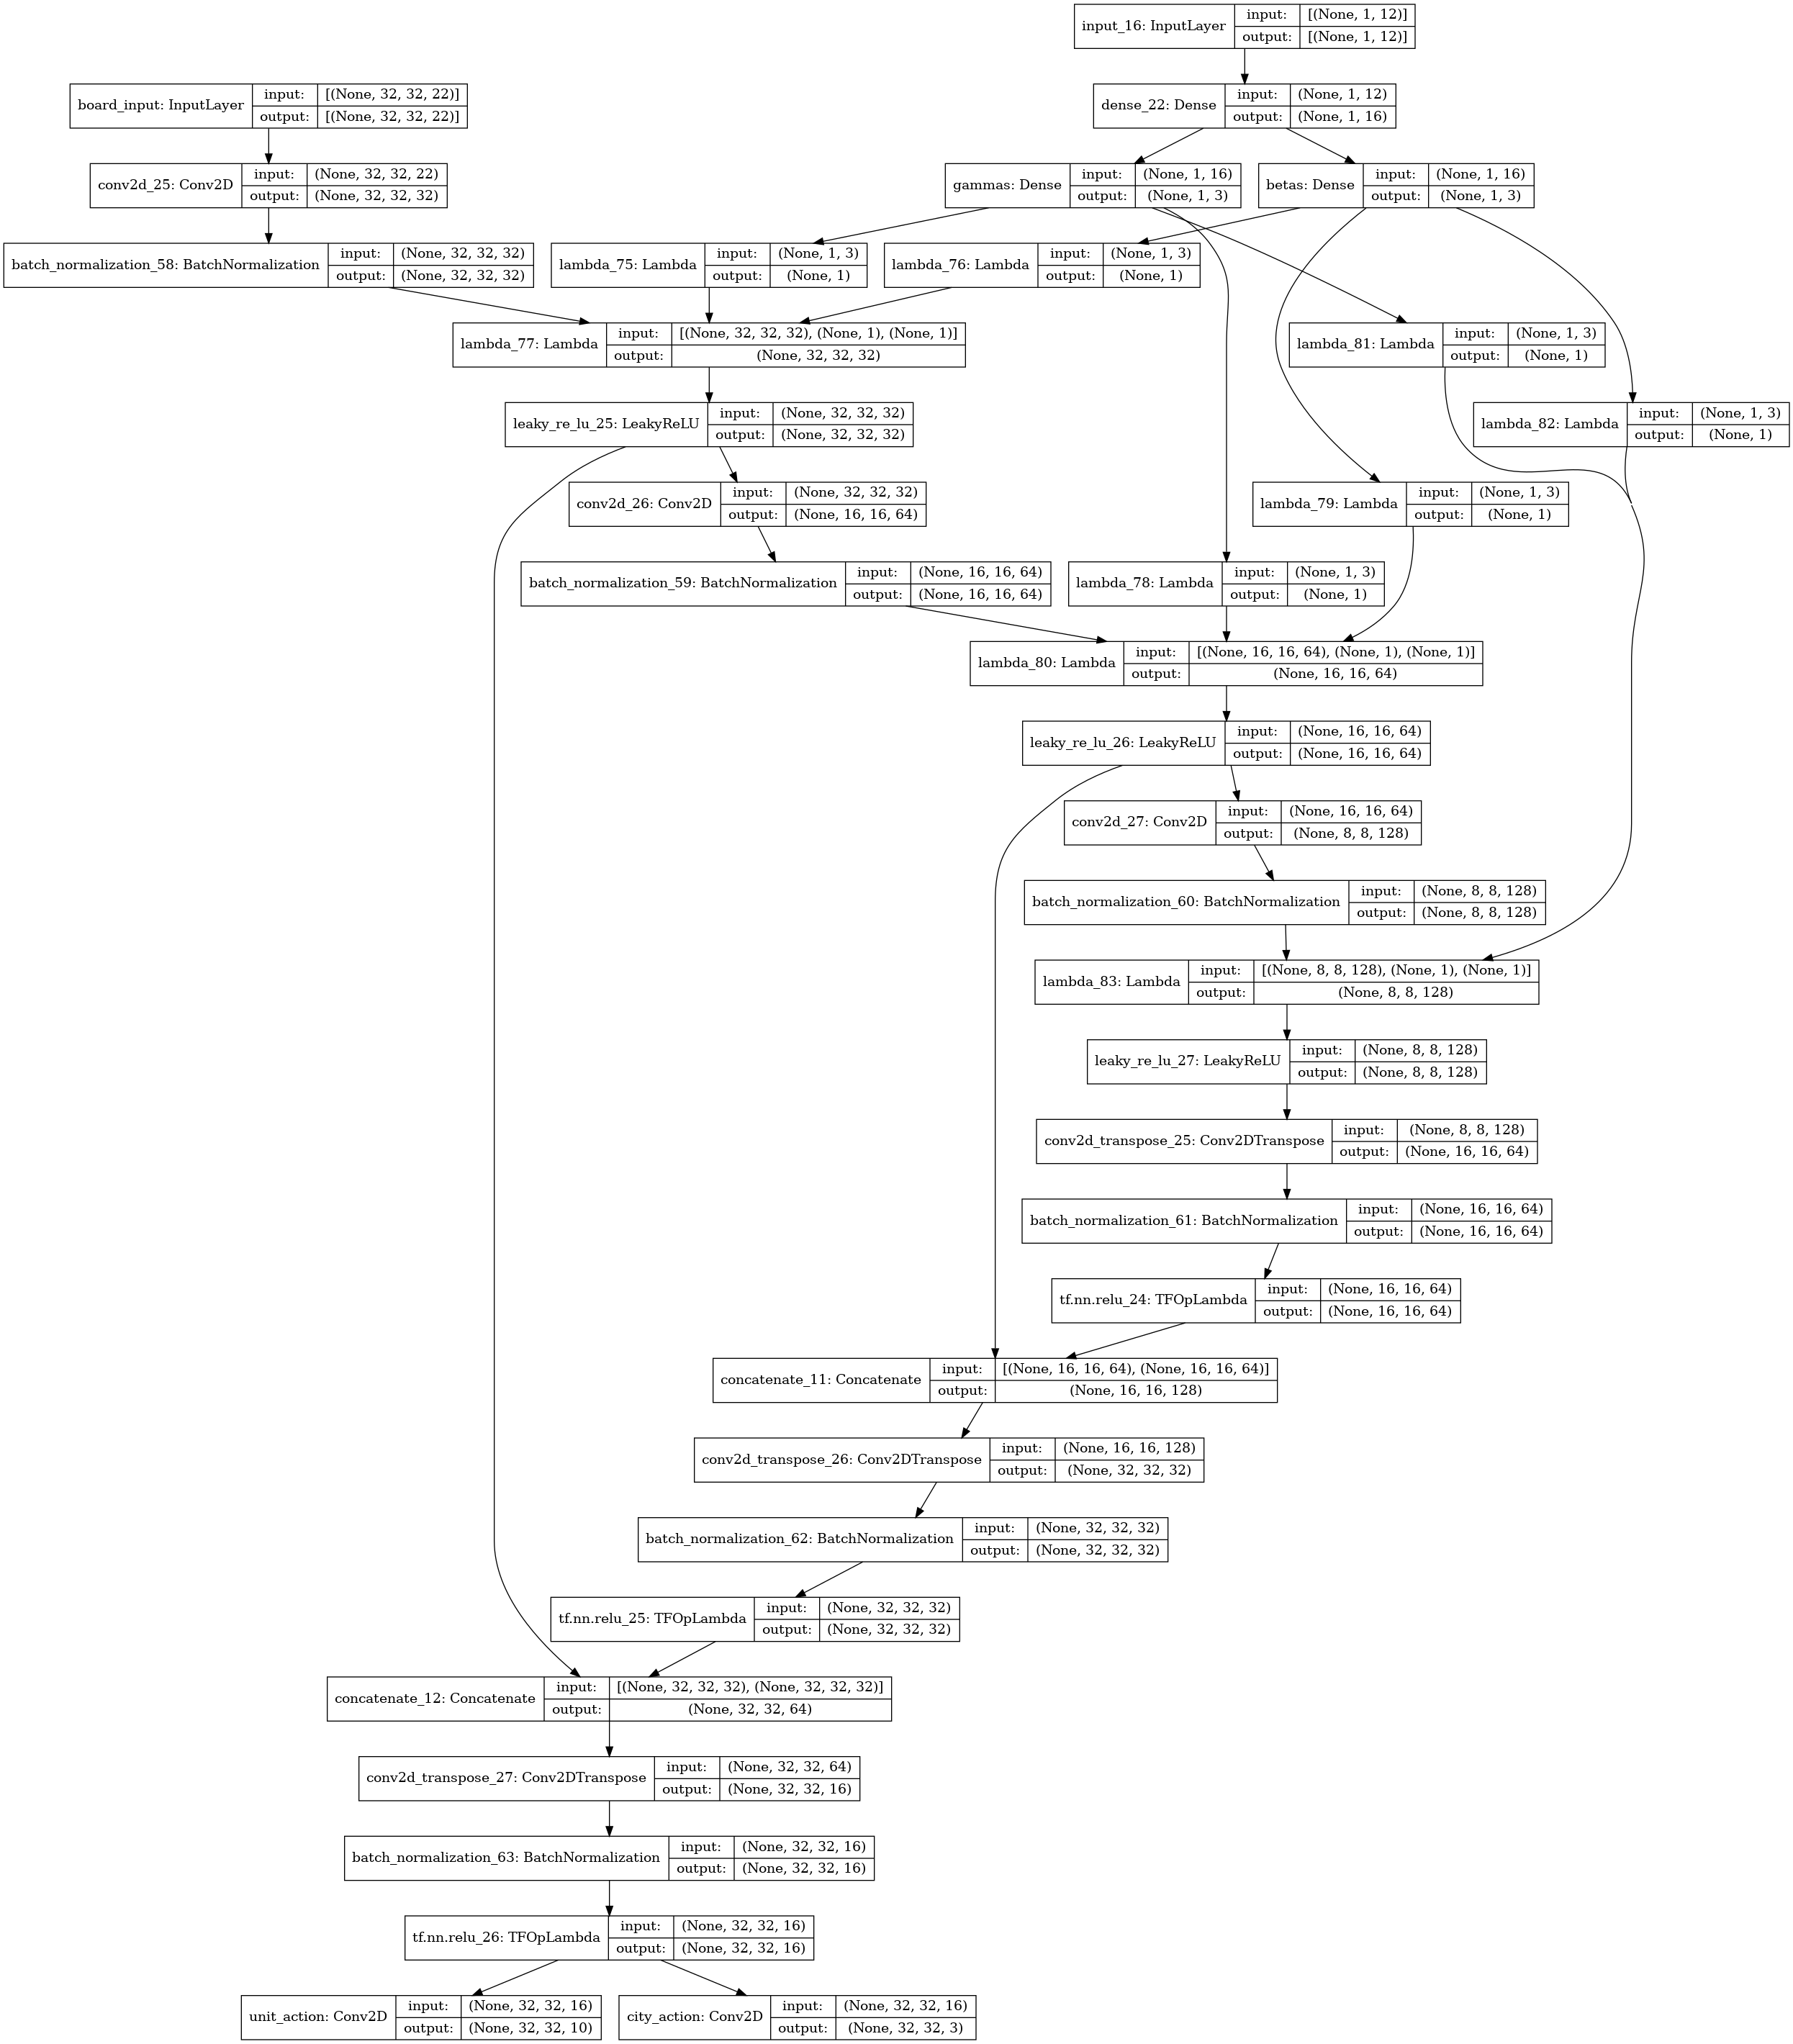

In [33]:
# Unet parameters
config.INPUT_SHAPE = [32, 32, 22] #[512, 128, 1]
config.FILTERS_LAYER_1 = 32 # 16
config.N_LAYERS = 3 # 6
config.ACT_LAST = 'sigmoid' # sigmoid
# Condition parameters
config.Z_DIM = 12 # 4
config.CONTROL_TYPE = 'dense' # dense
config.FILM_TYPE = 'simple' # simple
config.N_NEURONS = [16] # [16, 64, 256]
config.N_CONDITIONS = config.N_LAYERS # 6 this should be the same as the number of layers


model = cunet_luxai_model(config)
model.summary(line_length=150)
keras.utils.plot_model(model, show_shapes=True)

## Try the model on real data

### Create model

In [4]:
# Unet parameters
config.INPUT_SHAPE = [12, 12, 23] #[512, 128, 1]
config.FILTERS_LAYER_1 = 32 # 16
config.N_LAYERS = 3 # 6
config.ACT_LAST = 'sigmoid' # sigmoid
# Condition parameters
config.Z_DIM = 13 # 4
config.CONTROL_TYPE = 'dense' # dense
config.FILM_TYPE = 'simple' # simple
config.N_NEURONS = [16] # [16, 64, 256]
config.N_CONDITIONS = config.N_LAYERS # 6 this should be the same as the number of layers
# Other
config.LR = 1e-3 # 1e-3


model = cunet_luxai_model(config)

2021-10-18 06:54:53.011354: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-18 06:54:53.011405: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-10-18 06:54:53.011431: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-10-18 06:54:53.011459: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2021-10-18 06:54:53.011486: W tensorflow/stream_executor/platform/default/dso_loader.cc:64

### Create data

In [5]:
filepath  = '../data/sample_games/20210924_seed1_172steps.json'
with open(filepath, 'r') as f:
    match = json.load(f)

In [6]:
board, features, unit_output, city_output = [], [], [], []
for step in range(len(match['steps']) - 1):
    observation = match['steps'][step][0]['observation']
    actions = match['steps'][step+1][0]['action'] # notice the step + 150

    ret = make_input(observation)
    board.append(ret[0])
    features.append(ret[1])
    active_units_to_position, active_cities_to_position, units_to_position = ret[2:]
    unit_actions_mask = create_actions_mask(active_units_to_position, observation)
    city_actions_mask = create_actions_mask(active_cities_to_position, observation)
    unit_actions, city_actions = create_output_features(actions, units_to_position, observation)
    unit_output.append(np.concatenate([unit_actions, unit_actions_mask], axis=-1))
    city_output.append(np.concatenate([city_actions, city_actions_mask], axis=-1))

board = np.array(board, dtype=np.float32)
features = np.array(features, dtype=np.float32)
unit_output = np.array(unit_output, dtype=np.float32)
city_output = np.array(city_output, dtype=np.float32)

### Train

In [7]:
board.shape, features.shape, unit_output.shape, city_output.shape

((199, 12, 12, 23), (199, 1, 13), (199, 12, 12, 11), (199, 12, 12, 4))

In [8]:
model.inputs

[<KerasTensor: shape=(None, 12, 12, 23) dtype=float32 (created by layer 'board_input')>,
 <KerasTensor: shape=(None, 1, 13) dtype=float32 (created by layer 'input_1')>]

In [9]:
model.fit(x=[board, features], y=[unit_output, city_output], epochs=100)

2021-10-18 06:54:53.587370: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
7/7 [==============================] - 1s 25ms/step - loss: 1.2657 - unit_action_loss: 0.7122 - city_action_loss: 0.5535 - unit_action_masked_error: 0.4608 - city_action_masked_error: 0.1983
Epoch 2/100
7/7 [==============================] - 0s 23ms/step - loss: 0.8927 - unit_action_loss: 0.6236 - city_action_loss: 0.2691 - unit_action_masked_error: 0.3261 - city_action_masked_error: 0.0495
Epoch 3/100
7/7 [==============================] - 0s 22ms/step - loss: 0.7393 - unit_action_loss: 0.5465 - city_action_loss: 0.1928 - unit_action_masked_error: 0.2485 - city_action_masked_error: 0.0530
Epoch 4/100
7/7 [==============================] - 0s 23ms/step - loss: 0.6320 - unit_action_loss: 0.4744 - city_action_loss: 0.1576 - unit_action_masked_error: 0.1798 - city_action_masked_error: 0.0299
Epoch 5/100
7/7 [==============================] - 0s 21ms/step - loss: 0.5552 - unit_action_loss: 0.4211 - city_action_loss: 0.1341 - unit_action_masked_error: 0.1469 - city_action_masked

7/7 [==============================] - 0s 26ms/step - loss: 0.0586 - unit_action_loss: 0.0470 - city_action_loss: 0.0116 - unit_action_masked_error: 0.0105 - city_action_masked_error: 0.0017
Epoch 42/100
7/7 [==============================] - 0s 22ms/step - loss: 0.0534 - unit_action_loss: 0.0430 - city_action_loss: 0.0104 - unit_action_masked_error: 0.0096 - city_action_masked_error: 9.1569e-04
Epoch 43/100
7/7 [==============================] - 0s 25ms/step - loss: 0.0591 - unit_action_loss: 0.0438 - city_action_loss: 0.0153 - unit_action_masked_error: 0.0091 - city_action_masked_error: 0.0021
Epoch 44/100
7/7 [==============================] - 0s 26ms/step - loss: 0.0492 - unit_action_loss: 0.0401 - city_action_loss: 0.0092 - unit_action_masked_error: 0.0084 - city_action_masked_error: 8.9114e-04
Epoch 45/100
7/7 [==============================] - 0s 25ms/step - loss: 0.0557 - unit_action_loss: 0.0384 - city_action_loss: 0.0173 - unit_action_masked_error: 0.0090 - city_action_masked

7/7 [==============================] - 0s 24ms/step - loss: 0.0192 - unit_action_loss: 0.0149 - city_action_loss: 0.0043 - unit_action_masked_error: 0.0025 - city_action_masked_error: 9.8328e-04
Epoch 81/100
7/7 [==============================] - 0s 24ms/step - loss: 0.0170 - unit_action_loss: 0.0123 - city_action_loss: 0.0047 - unit_action_masked_error: 0.0027 - city_action_masked_error: 7.3746e-04
Epoch 82/100
7/7 [==============================] - 0s 25ms/step - loss: 0.0158 - unit_action_loss: 0.0119 - city_action_loss: 0.0040 - unit_action_masked_error: 0.0019 - city_action_masked_error: 6.8306e-04
Epoch 83/100
7/7 [==============================] - 0s 23ms/step - loss: 0.0159 - unit_action_loss: 0.0120 - city_action_loss: 0.0039 - unit_action_masked_error: 0.0023 - city_action_masked_error: 9.9206e-04
Epoch 84/100
7/7 [==============================] - 0s 24ms/step - loss: 0.0155 - unit_action_loss: 0.0104 - city_action_loss: 0.0051 - unit_action_masked_error: 0.0016 - city_actio

We can see that the model is able to reduce the loss a lot. Let's check the predictions.

Also the error gets down to very good numbers. It starts around 50% because they are binary labels.

In [10]:
pred = model.predict([board, features])

In [11]:
unit_output.shape

(199, 12, 12, 11)

In [12]:
def show_unit_action_predictions(step):
    n_cols = len(UNIT_ACTIONS_MAP)
    for name, idx in UNIT_ACTIONS_MAP.items():
        plt.subplot(1, n_cols, idx % n_cols + 1)
        action_map = unit_output[step, :, :, idx]
        plt.imshow(np.transpose(action_map), vmax=1, vmin=0)
        plt.title('%s (%.1f)' % (name, np.max(action_map)))
    plt.suptitle('Labels')
    plt.show()
    for name, idx in UNIT_ACTIONS_MAP.items():
        plt.subplot(1, n_cols, idx % n_cols + 1)
        action_map = pred[0][step][:, :, idx]*unit_output[step, :, :, -1]
        plt.imshow(np.transpose(action_map), vmax=1, vmin=0)
        plt.title('%s (%.1f)' % (name, np.max(action_map)))
    plt.suptitle('Masked predictions')
    plt.show()
    for name, idx in UNIT_ACTIONS_MAP.items():
        plt.subplot(1, n_cols, idx % n_cols + 1)
        action_map = pred[0][step][:, :, idx]
        plt.imshow(np.transpose(action_map), vmax=1, vmin=0)
        plt.title('%s (%.1f)' % (name, np.max(action_map)))
    plt.suptitle('Unmasked predictions')
    plt.show()
    
def show_city_action_predictions(step):
    n_cols = len(CITY_ACTIONS_MAP)
    for name, idx in CITY_ACTIONS_MAP.items():
        plt.subplot(1, n_cols, idx % n_cols + 1)
        action_map = city_output[step, :, :, idx]
        plt.imshow(np.transpose(action_map), vmax=1, vmin=0)
        plt.title('%s (%.1f)' % (name, np.max(action_map)))
    plt.suptitle('Labels')
    plt.show()
    for name, idx in CITY_ACTIONS_MAP.items():
        plt.subplot(1, n_cols, idx % n_cols + 1)
        action_map = pred[1][step][:, :, idx]*city_output[step, :, :, -1]
        plt.imshow(np.transpose(action_map), vmax=1, vmin=0)
        plt.title('%s (%.1f)' % (name, np.max(action_map)))
    plt.suptitle('Masked predictions')
    plt.show()
    for name, idx in CITY_ACTIONS_MAP.items():
        plt.subplot(1, n_cols, idx % n_cols + 1)
        action_map = pred[1][step][:, :, idx]
        plt.imshow(np.transpose(action_map), vmax=1, vmin=0)
        plt.title('%s (%.1f)' % (name, np.max(action_map)))
    plt.suptitle('Unmasked predictions')
    plt.show()

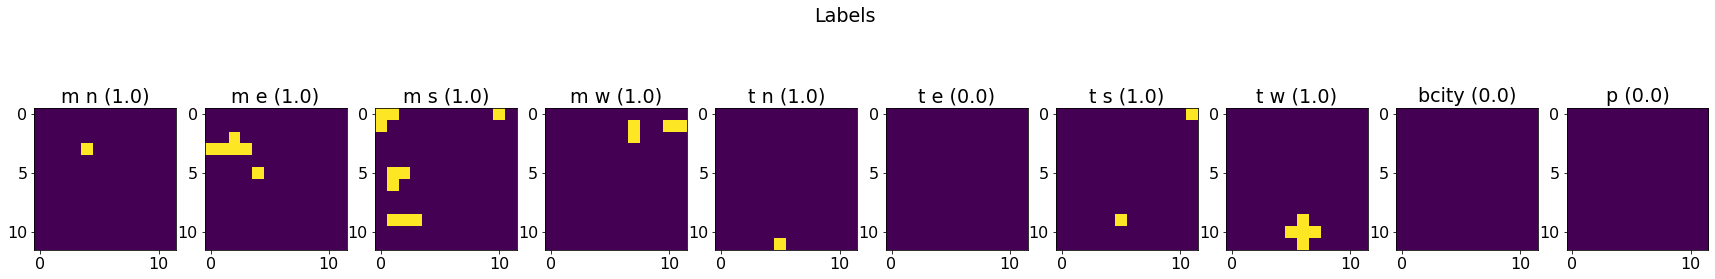

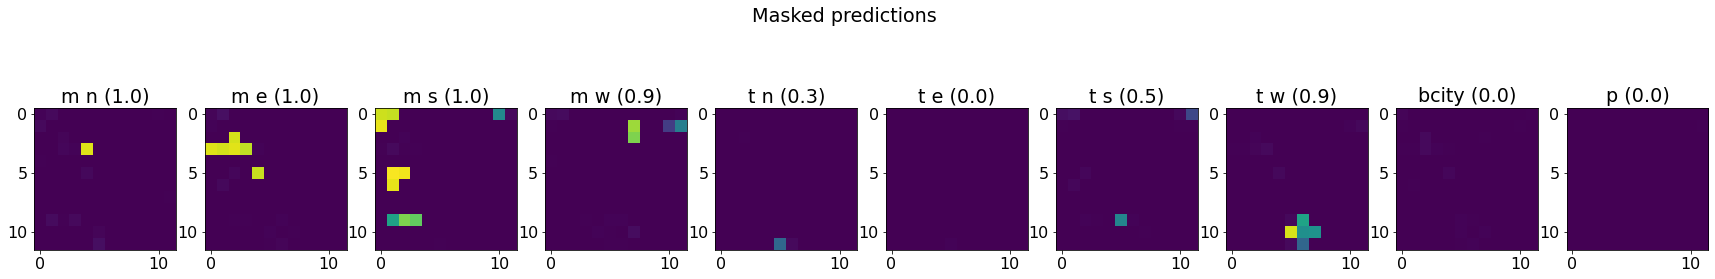

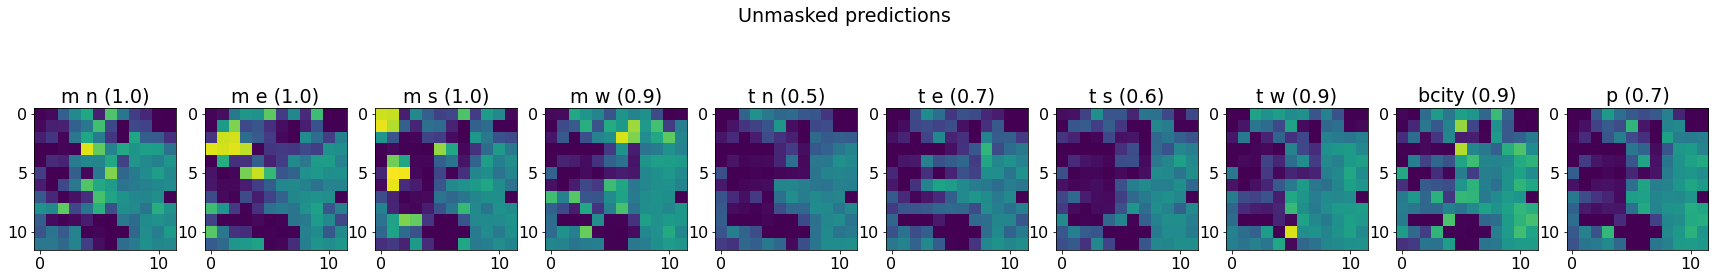

In [13]:
show_unit_action_predictions(160)

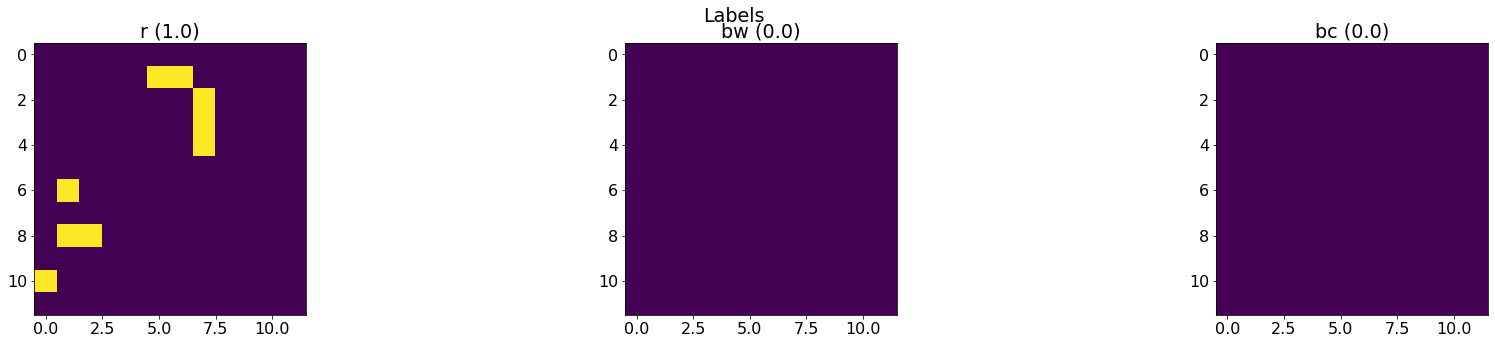

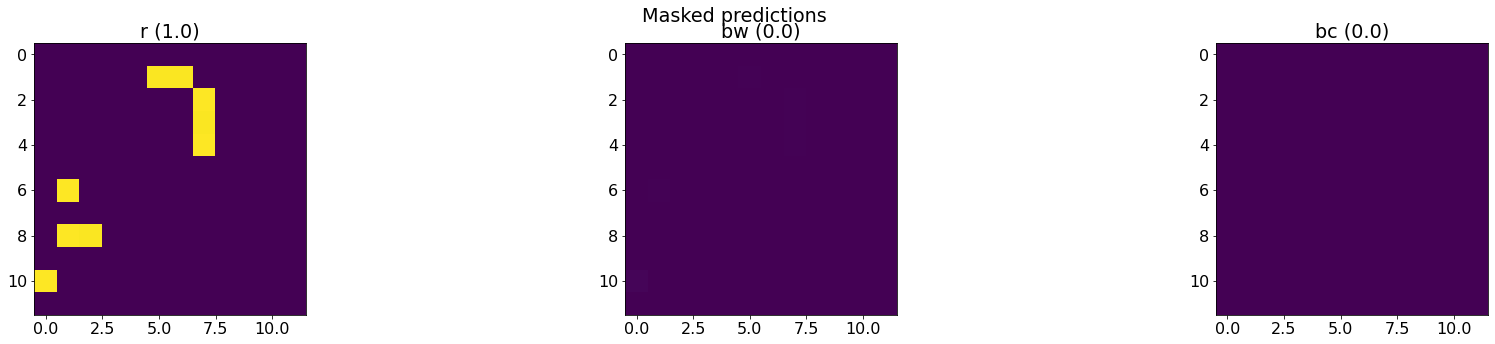

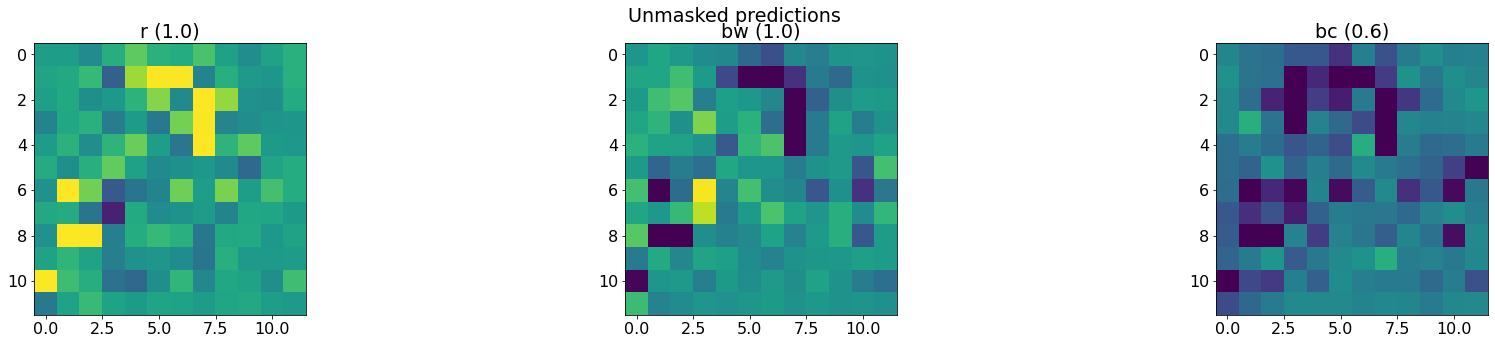

In [14]:
show_city_action_predictions(52)

## Train more and save to file

I want to see that it is able to play like me, let's play for longer to reduce the error even more.

In [15]:
model.fit(x=[board, features], y=[unit_output, city_output], epochs=100)

Epoch 1/100
7/7 [==============================] - 0s 23ms/step - loss: 0.0123 - unit_action_loss: 0.0074 - city_action_loss: 0.0049 - unit_action_masked_error: 0.0013 - city_action_masked_error: 9.9206e-04
Epoch 2/100
7/7 [==============================] - 0s 26ms/step - loss: 0.0103 - unit_action_loss: 0.0076 - city_action_loss: 0.0028 - unit_action_masked_error: 0.0014 - city_action_masked_error: 3.5558e-04
Epoch 3/100
7/7 [==============================] - 0s 24ms/step - loss: 0.0108 - unit_action_loss: 0.0074 - city_action_loss: 0.0035 - unit_action_masked_error: 0.0014 - city_action_masked_error: 9.4646e-04
Epoch 4/100
7/7 [==============================] - 0s 24ms/step - loss: 0.0106 - unit_action_loss: 0.0068 - city_action_loss: 0.0038 - unit_action_masked_error: 0.0015 - city_action_masked_error: 0.0034 
Epoch 5/100
7/7 [==============================] - 0s 23ms/step - loss: 0.0142 - unit_action_loss: 0.0069 - city_action_loss: 0.0073 - unit_action_masked_error: 0.0013 - city_

7/7 [==============================] - 0s 23ms/step - loss: 0.0076 - unit_action_loss: 0.0043 - city_action_loss: 0.0033 - unit_action_masked_error: 0.0011 - city_action_masked_error: 0.0011
Epoch 41/100
7/7 [==============================] - 0s 23ms/step - loss: 0.0062 - unit_action_loss: 0.0041 - city_action_loss: 0.0021 - unit_action_masked_error: 9.1309e-04 - city_action_masked_error: 6.8418e-04
Epoch 42/100
7/7 [==============================] - 0s 22ms/step - loss: 0.0053 - unit_action_loss: 0.0037 - city_action_loss: 0.0016 - unit_action_masked_error: 6.3523e-04 - city_action_masked_error: 0.0000e+00
Epoch 43/100
7/7 [==============================] - 0s 25ms/step - loss: 0.0051 - unit_action_loss: 0.0038 - city_action_loss: 0.0013 - unit_action_masked_error: 9.0331e-04 - city_action_masked_error: 0.0000e+00
Epoch 44/100
7/7 [==============================] - 0s 24ms/step - loss: 0.0048 - unit_action_loss: 0.0035 - city_action_loss: 0.0014 - unit_action_masked_error: 7.3552e-04 

7/7 [==============================] - 0s 22ms/step - loss: 0.0041 - unit_action_loss: 0.0035 - city_action_loss: 5.6350e-04 - unit_action_masked_error: 0.0013 - city_action_masked_error: 0.0000e+00
Epoch 79/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0037 - unit_action_loss: 0.0032 - city_action_loss: 5.4078e-04 - unit_action_masked_error: 7.7922e-04 - city_action_masked_error: 0.0000e+00
Epoch 80/100
7/7 [==============================] - 0s 23ms/step - loss: 0.0044 - unit_action_loss: 0.0038 - city_action_loss: 5.6652e-04 - unit_action_masked_error: 0.0011 - city_action_masked_error: 0.0000e+00
Epoch 81/100
7/7 [==============================] - 0s 26ms/step - loss: 0.0037 - unit_action_loss: 0.0032 - city_action_loss: 4.9364e-04 - unit_action_masked_error: 0.0021 - city_action_masked_error: 0.0000e+00
Epoch 82/100
7/7 [==============================] - 0s 23ms/step - loss: 0.0046 - unit_action_loss: 0.0040 - city_action_loss: 5.4703e-04 - unit_action_masked_er

In [16]:
model.fit(x=[board, features], y=[unit_output, city_output], epochs=100)

Epoch 1/100
7/7 [==============================] - 0s 20ms/step - loss: 0.0026 - unit_action_loss: 0.0021 - city_action_loss: 5.0143e-04 - unit_action_masked_error: 5.0231e-04 - city_action_masked_error: 0.0000e+00
Epoch 2/100
7/7 [==============================] - 0s 22ms/step - loss: 0.0025 - unit_action_loss: 0.0020 - city_action_loss: 4.6258e-04 - unit_action_masked_error: 6.4629e-04 - city_action_masked_error: 0.0000e+00
Epoch 3/100
7/7 [==============================] - 0s 23ms/step - loss: 0.0024 - unit_action_loss: 0.0021 - city_action_loss: 3.1538e-04 - unit_action_masked_error: 6.2802e-04 - city_action_masked_error: 0.0000e+00
Epoch 4/100
7/7 [==============================] - 0s 21ms/step - loss: 0.0023 - unit_action_loss: 0.0019 - city_action_loss: 3.6697e-04 - unit_action_masked_error: 4.7624e-04 - city_action_masked_error: 0.0000e+00
Epoch 5/100
7/7 [==============================] - 0s 19ms/step - loss: 0.0023 - unit_action_loss: 0.0019 - city_action_loss: 3.7525e-04 - u

7/7 [==============================] - 0s 24ms/step - loss: 0.0064 - unit_action_loss: 0.0026 - city_action_loss: 0.0038 - unit_action_masked_error: 0.0010 - city_action_masked_error: 0.0012     
Epoch 40/100
7/7 [==============================] - 0s 23ms/step - loss: 0.0062 - unit_action_loss: 0.0026 - city_action_loss: 0.0036 - unit_action_masked_error: 7.8505e-04 - city_action_masked_error: 0.0015 
Epoch 41/100
7/7 [==============================] - 0s 25ms/step - loss: 0.0239 - unit_action_loss: 0.0113 - city_action_loss: 0.0126 - unit_action_masked_error: 0.0035 - city_action_masked_error: 0.0028
Epoch 42/100
7/7 [==============================] - 0s 24ms/step - loss: 0.0209 - unit_action_loss: 0.0116 - city_action_loss: 0.0094 - unit_action_masked_error: 0.0039 - city_action_masked_error: 0.0028
Epoch 43/100
7/7 [==============================] - 0s 23ms/step - loss: 0.0132 - unit_action_loss: 0.0105 - city_action_loss: 0.0027 - unit_action_masked_error: 0.0038 - city_action_mask

7/7 [==============================] - 0s 25ms/step - loss: 0.0017 - unit_action_loss: 0.0015 - city_action_loss: 2.8009e-04 - unit_action_masked_error: 3.9136e-04 - city_action_masked_error: 0.0000e+00
Epoch 78/100
7/7 [==============================] - 0s 25ms/step - loss: 0.0016 - unit_action_loss: 0.0014 - city_action_loss: 2.2099e-04 - unit_action_masked_error: 0.0010 - city_action_masked_error: 0.0000e+00     
Epoch 79/100
7/7 [==============================] - 0s 25ms/step - loss: 0.0020 - unit_action_loss: 0.0017 - city_action_loss: 2.3321e-04 - unit_action_masked_error: 4.5822e-04 - city_action_masked_error: 0.0000e+00
Epoch 80/100
7/7 [==============================] - 0s 25ms/step - loss: 0.0036 - unit_action_loss: 0.0034 - city_action_loss: 2.5820e-04 - unit_action_masked_error: 7.3189e-04 - city_action_masked_error: 0.0000e+00
Epoch 81/100
7/7 [==============================] - 0s 26ms/step - loss: 0.0034 - unit_action_loss: 0.0032 - city_action_loss: 2.3571e-04 - unit_act

In [19]:
model.optimizer.learning_rate = 1e-4
model.fit(x=[board, features], y=[unit_output, city_output], epochs=100)

Epoch 1/100
7/7 [==============================] - 0s 21ms/step - loss: 0.0013 - unit_action_loss: 0.0012 - city_action_loss: 1.8587e-04 - unit_action_masked_error: 3.6560e-04 - city_action_masked_error: 0.0000e+00 
Epoch 2/100
7/7 [==============================] - 0s 24ms/step - loss: 0.0013 - unit_action_loss: 0.0011 - city_action_loss: 1.5603e-04 - unit_action_masked_error: 3.6373e-04 - city_action_masked_error: 0.0000e+00
Epoch 3/100
7/7 [==============================] - 0s 23ms/step - loss: 0.0012 - unit_action_loss: 0.0010 - city_action_loss: 1.5821e-04 - unit_action_masked_error: 2.0082e-04 - city_action_masked_error: 0.0000e+00 
Epoch 4/100
7/7 [==============================] - 0s 25ms/step - loss: 0.0012 - unit_action_loss: 0.0010 - city_action_loss: 1.7951e-04 - unit_action_masked_error: 2.4072e-04 - city_action_masked_error: 0.0000e+00 
Epoch 5/100
7/7 [==============================] - 0s 24ms/step - loss: 0.0013 - unit_action_loss: 0.0011 - city_action_loss: 1.8531e-04 

7/7 [==============================] - 0s 20ms/step - loss: 0.0011 - unit_action_loss: 9.4327e-04 - city_action_loss: 1.5452e-04 - unit_action_masked_error: 1.9076e-04 - city_action_masked_error: 0.0000e+00
Epoch 39/100
7/7 [==============================] - 0s 23ms/step - loss: 0.0011 - unit_action_loss: 9.7787e-04 - city_action_loss: 1.5385e-04 - unit_action_masked_error: 2.8763e-04 - city_action_masked_error: 0.0000e+00
Epoch 40/100
7/7 [==============================] - 0s 25ms/step - loss: 0.0012 - unit_action_loss: 0.0010 - city_action_loss: 1.8767e-04 - unit_action_masked_error: 7.1042e-04 - city_action_masked_error: 0.0000e+00
Epoch 41/100
7/7 [==============================] - 0s 23ms/step - loss: 0.0012 - unit_action_loss: 0.0010 - city_action_loss: 1.8834e-04 - unit_action_masked_error: 1.0051e-04 - city_action_masked_error: 0.0000e+00
Epoch 42/100
7/7 [==============================] - 0s 24ms/step - loss: 0.0012 - unit_action_loss: 0.0010 - city_action_loss: 2.0201e-04 - u

7/7 [==============================] - 0s 19ms/step - loss: 0.0010 - unit_action_loss: 8.6708e-04 - city_action_loss: 1.6326e-04 - unit_action_masked_error: 9.6962e-05 - city_action_masked_error: 0.0000e+00
Epoch 76/100
7/7 [==============================] - 0s 18ms/step - loss: 0.0010 - unit_action_loss: 8.9533e-04 - city_action_loss: 1.3665e-04 - unit_action_masked_error: 5.1132e-04 - city_action_masked_error: 0.0000e+00
Epoch 77/100
7/7 [==============================] - 0s 18ms/step - loss: 0.0011 - unit_action_loss: 8.1901e-04 - city_action_loss: 2.3695e-04 - unit_action_masked_error: 8.7292e-05 - city_action_masked_error: 0.0000e+00
Epoch 78/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0011 - unit_action_loss: 8.9044e-04 - city_action_loss: 1.6887e-04 - unit_action_masked_error: 1.6131e-04 - city_action_masked_error: 0.0000e+00
Epoch 79/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0011 - unit_action_loss: 9.6453e-04 - city_action_loss: 1.

In [20]:
model.optimizer.learning_rate = 1e-5
model.fit(x=[board, features], y=[unit_output, city_output], epochs=100)

Epoch 1/100
7/7 [==============================] - 0s 21ms/step - loss: 9.7145e-04 - unit_action_loss: 8.4532e-04 - city_action_loss: 1.2613e-04 - unit_action_masked_error: 1.5432e-04 - city_action_masked_error: 0.0000e+00
Epoch 2/100
7/7 [==============================] - 0s 25ms/step - loss: 0.0010 - unit_action_loss: 8.8492e-04 - city_action_loss: 1.2090e-04 - unit_action_masked_error: 2.1411e-04 - city_action_masked_error: 0.0000e+00
Epoch 3/100
7/7 [==============================] - 0s 25ms/step - loss: 8.8483e-04 - unit_action_loss: 7.6179e-04 - city_action_loss: 1.2303e-04 - unit_action_masked_error: 1.6955e-04 - city_action_masked_error: 0.0000e+00
Epoch 4/100
7/7 [==============================] - 0s 24ms/step - loss: 0.0010 - unit_action_loss: 8.6225e-04 - city_action_loss: 1.7272e-04 - unit_action_masked_error: 2.8754e-04 - city_action_masked_error: 0.0000e+00
Epoch 5/100
7/7 [==============================] - 0s 24ms/step - loss: 9.7794e-04 - unit_action_loss: 8.1675e-04 - 

7/7 [==============================] - 0s 20ms/step - loss: 9.0693e-04 - unit_action_loss: 7.8085e-04 - city_action_loss: 1.2608e-04 - unit_action_masked_error: 1.3048e-04 - city_action_masked_error: 0.0000e+00
Epoch 38/100
7/7 [==============================] - 0s 21ms/step - loss: 9.3498e-04 - unit_action_loss: 7.9727e-04 - city_action_loss: 1.3771e-04 - unit_action_masked_error: 9.4705e-05 - city_action_masked_error: 0.0000e+00
Epoch 39/100
7/7 [==============================] - 0s 20ms/step - loss: 8.9215e-04 - unit_action_loss: 7.5060e-04 - city_action_loss: 1.4154e-04 - unit_action_masked_error: 1.1651e-04 - city_action_masked_error: 0.0000e+00
Epoch 40/100
7/7 [==============================] - 0s 24ms/step - loss: 8.6304e-04 - unit_action_loss: 7.2663e-04 - city_action_loss: 1.3641e-04 - unit_action_masked_error: 5.9773e-05 - city_action_masked_error: 0.0000e+00
Epoch 41/100
7/7 [==============================] - 0s 25ms/step - loss: 9.0771e-04 - unit_action_loss: 7.8142e-04 - 

7/7 [==============================] - 0s 21ms/step - loss: 0.0010 - unit_action_loss: 7.9725e-04 - city_action_loss: 2.1279e-04 - unit_action_masked_error: 1.0582e-04 - city_action_masked_error: 0.0000e+00
Epoch 74/100
7/7 [==============================] - 0s 20ms/step - loss: 9.2286e-04 - unit_action_loss: 7.5679e-04 - city_action_loss: 1.6607e-04 - unit_action_masked_error: 2.8701e-04 - city_action_masked_error: 0.0000e+00
Epoch 75/100
7/7 [==============================] - 0s 20ms/step - loss: 9.0506e-04 - unit_action_loss: 7.6359e-04 - city_action_loss: 1.4146e-04 - unit_action_masked_error: 9.2879e-05 - city_action_masked_error: 0.0000e+00
Epoch 76/100
7/7 [==============================] - 0s 20ms/step - loss: 8.7740e-04 - unit_action_loss: 7.2925e-04 - city_action_loss: 1.4814e-04 - unit_action_masked_error: 5.6689e-05 - city_action_masked_error: 0.0000e+00
Epoch 77/100
7/7 [==============================] - 0s 20ms/step - loss: 9.4447e-04 - unit_action_loss: 7.8055e-04 - city

I'm not able to reach perfect accuracy but it is close.

In [21]:
model.save('model.h5', include_optimizer=False)

There seems to be a problem with city masks.

TODO: 

- assert that there is no action outside the mask on tests
- Verify that it's able to play like me on that match